# 데이터 설명

* school: 학교 이름
* school_setting: 학교가 위치한 곳(Urban(도시), Suburban(교외), Rural(시골))
* school_type: Public(공립학교), Non-public(사립학교)
* classroom: 교실 종류?
* teaching_method: Experimental(실험적 교육), Standard(기존 교육)
* n_student: number of students in the class
* student_id
* gender
* lunch: whether a student qualifies for free/subsidized lunch or not
* pretest: 수업 전 진행한 시험 점수
* posttest: 수업 후 진행한 시험 점수

Typically, a pretest is given to students at the beginning of a course to determine their initial understanding of the measures stated in the learning objectives, and posttest is conducted just after completion of the course to determine what the students have learned.

* 미국은 Suburban School이 대학 진학에 유리하며, 명문고등학교의 입지를 갖고 있음
* Low-income children are eligible to receive reduced-price or free meals at school. Children in households with incomes below 130 percent of the poverty level or those receiving SNAP or TANF qualify for free meals. Those with family incomes between 130 and 185 percent of the poverty line qualify for reduced-price meals.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/test_scores.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [3]:
df.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [4]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='posttest', ylabel='Density'>

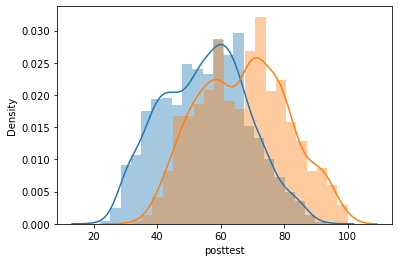

In [5]:
sns.distplot(df["pretest"])
sns.distplot(df["posttest"])

# 가설 설정 & 데이터 분석

## 학교 위치(도시, 교외, 시골)에 따라 

### pretest, posttest 결과가 다를 것이다.

In [6]:
df.groupby(["school_setting"])["pretest", "posttest"].describe()

<ipython-input-6-0346e3b47137>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["school_setting"])["pretest", "posttest"].describe()


pretest                                                      \
                 count       mean        std   min   25%   50%   75%   max   
school_setting                                                               
Rural            510.0  51.490196  10.816876  26.0  44.0  53.0  60.0  73.0   
Suburban         717.0  63.841004  10.583789  36.0  57.0  64.0  71.0  91.0   
Urban            906.0  49.875276  13.556630  22.0  39.0  48.0  59.0  93.0   

               posttest                                                       
                  count       mean        std   min   25%   50%   75%    max  
school_setting                                                                
Rural             510.0  64.050980  12.093827  36.0  56.0  67.0  73.0   88.0  
Suburban          717.0  76.037657  11.046624  49.0  68.0  76.0  84.0   99.0  
Urban             906.0  61.748344  13.596417  32.0  51.0  59.0  70.0  100.0

* mean: Suburban > Urban > Rural
* min: Suburban > Rural > Urban
* max: Urban > Suburban > Rural

<AxesSubplot:xlabel='pretest', ylabel='count'>

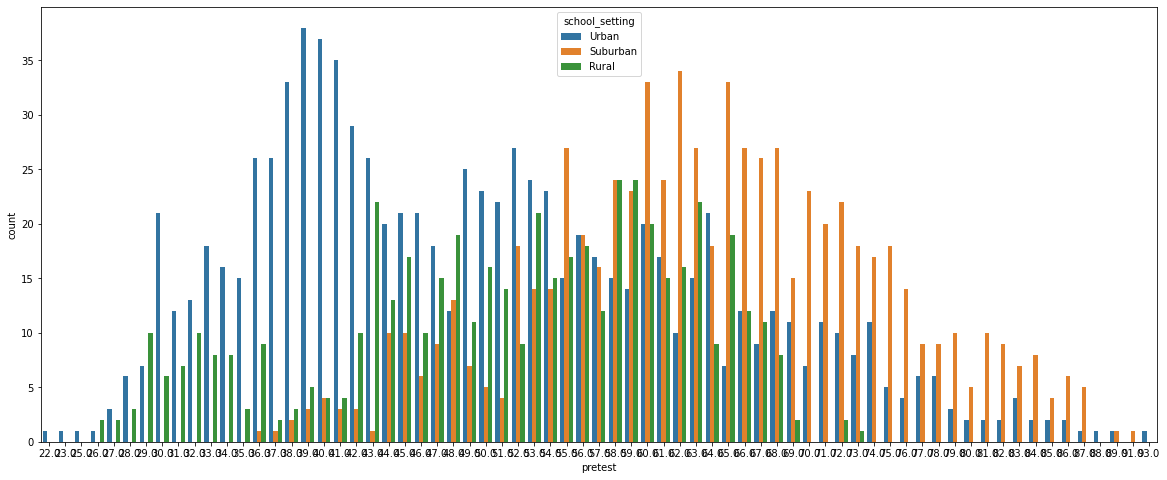

In [7]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x="pretest", hue="school_setting")

<AxesSubplot:xlabel='school_setting', ylabel='pretest'>

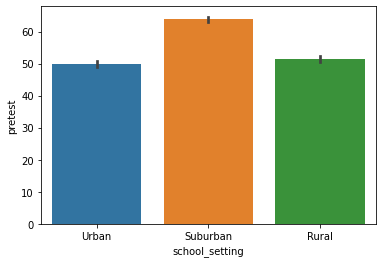

In [8]:
#plt.figure(figsize=(20, 8))
sns.barplot(data=df, x="school_setting", y="pretest")

<AxesSubplot:xlabel='school_setting', ylabel='pretest'>

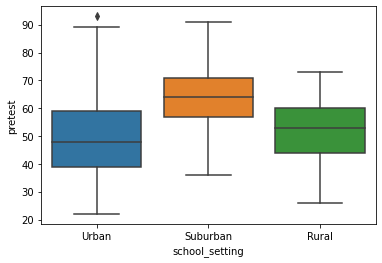

In [9]:
sns.boxplot(data=df, x="school_setting", y="pretest")

Urban에 이상치가 있는것으로 예측됨

In [10]:
df_urban = df[df["school_setting"]=="Urban"]
df_suburban = df[df["school_setting"]=="Suburban"]
df_rural = df[df["school_setting"]=="Rural"]

df_urban.shape, df_suburban.shape, df_rural.shape

((906, 11), (717, 11), (510, 11))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='pretest', ylabel='Density'>

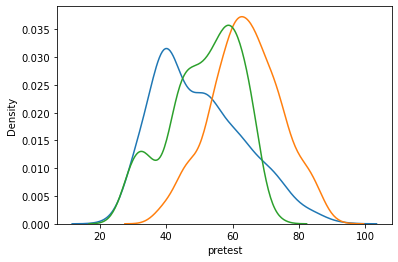

In [11]:
#pretest 결과
sns.distplot(df_urban["pretest"], hist=False, label="Urban")
sns.distplot(df_suburban["pretest"], hist=False, label="Suburban")
sns.distplot(df_rural["pretest"], hist=False, label="Rural")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:xlabel='posttest', ylabel='Density'>

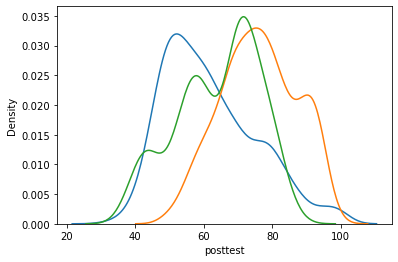

In [12]:
#posttest 결과
sns.distplot(df_urban["posttest"], hist=False)
sns.distplot(df_suburban["posttest"], hist=False)
sns.distplot(df_rural["posttest"], hist=False)

### 소득 수준이 다를 것이다.

In [14]:
df["lunch"].value_counts()

Does not qualify                    1215
Qualifies for reduced/free lunch     918
Name: lunch, dtype: int64

In [22]:

df["lunch"] = df["lunch"].replace(["Does not qualify", "Qualifies for reduced/free lunch"], [0,1], regex=True)
#object => 0과 1로 변경


In [23]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,0,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,0,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,0,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,0,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,0,64.0,76.0


In [24]:
df.tail()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,0,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,1,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,1,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,1,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,1,41.0,48.0


<AxesSubplot:xlabel='lunch', ylabel='count'>

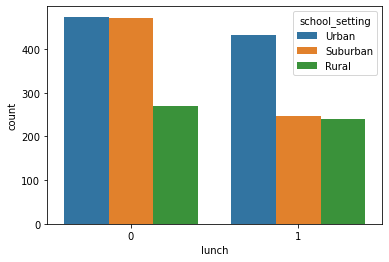

In [35]:
sns.countplot(data=df, x="lunch", hue="school_setting")

* Suburban은 부유한 계층(0)이 많고 저소득 계층(1)이 적음
* Urban은 둘 다 많음

## 학교 타입(공립, 사립)에 따라 시험 결과가 다를 것이다.

In [18]:
df.groupby(["school_type"])["pretest", "posttest"].describe()

<ipython-input-18-abb2cdf5ded4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["school_type"])["pretest", "posttest"].describe()


pretest                                                      \
              count       mean        std   min   25%   50%   75%   max   
school_type                                                               
Non-public    551.0  63.254083  10.342184  37.0  58.0  64.0  70.0  93.0   
Public       1582.0  52.065740  13.360500  22.0  42.0  52.0  61.0  91.0   

            posttest                                                       
               count       mean        std   min   25%   50%   75%    max  
school_type                                                                
Non-public     551.0  75.961887  10.539812  44.0  71.0  77.0  82.0  100.0  
Public        1582.0  64.016435  13.721537  32.0  54.0  63.0  73.0   99.0

<AxesSubplot:xlabel='school_type', ylabel='pretest'>

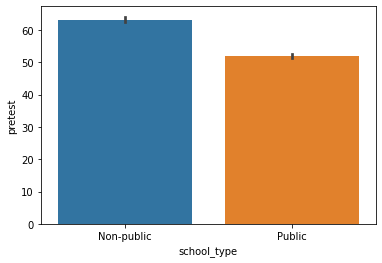

In [19]:
sns.barplot(data=df, x="school_type", y="pretest")

<AxesSubplot:xlabel='school_type', ylabel='posttest'>

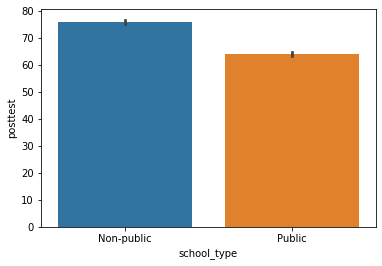

In [20]:
sns.barplot(data=df, x="school_type", y="posttest")

<AxesSubplot:xlabel='school_type', ylabel='pretest'>

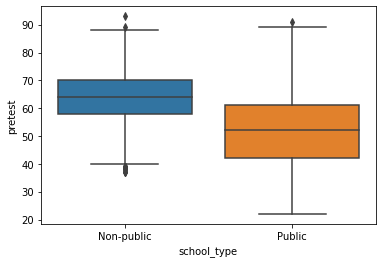

In [21]:
sns.boxplot(data=df, x="school_type", y="pretest")

In [60]:
lunch_0_nonP = df[(df["lunch"]==0) 
   & (df["school_type"]=="Non-public")].count()[0]
lunch_1_nonP = df[(df["lunch"]==1) 
   & (df["school_type"]=="Non-public")].count()[0]
nonP = df[df["school_type"]=="Non-public"].count()[0]

lunch_0_P = df[(df["lunch"]==0) 
   & (df["school_type"]=="Public")].count()[0]
lunch_1_P = df[(df["lunch"]==1) 
   & (df["school_type"]=="Public")].count()[0]
P = df[df["school_type"]=="Public"].count()[0]

#사립 학교의 고소득/ 저소득 비율
print(lunch_0_nonP/nonP * 100, lunch_1_nonP/nonP * 100)

#공립 학교의 고소득/ 저소득 비율
print(lunch_0_P/P * 100, lunch_1_P/P * 100)

71.32486388384754 28.67513611615245
51.959544879898864 48.040455120101136


<AxesSubplot:xlabel='school_type', ylabel='count'>

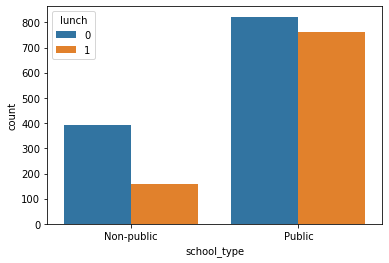

In [61]:
#소득 수준 확인
sns.countplot(data=df, x="school_type", hue="lunch")

## 교육 방식(실험적, 기존)에 따라 시험 결과가 다를 것이다.

In [64]:
df_experimental = df[df["teaching_method"]=="Experimental"]
df_standard = df[df["teaching_method"]=="Standard"]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pretest', ylabel='Density'>

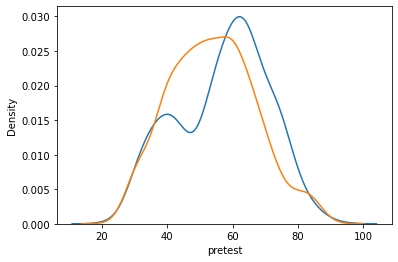

In [66]:
sns.distplot(df_experimental["pretest"], hist=False)
sns.distplot(df_standard["pretest"], hist=False)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='posttest', ylabel='Density'>

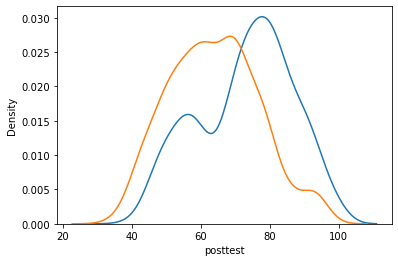

In [74]:
sns.distplot(df_experimental["posttest"], hist=False)
sns.distplot(df_standard["posttest"], hist=False)

## pretest 점수가 높은 아이들은 posttest 결과가 높을 것이다.

In [132]:
df_test = df[["pretest", "posttest"]]
df_test

,pretest,posttest
0,62.0,72.0
1,66.0,79.0
2,64.0,76.0
3,61.0,77.0
4,64.0,76.0
...,...,...
2128,39.0,55.0
2129,38.0,46.0
2130,45.0,51.0
2131,46.0,53.0


In [133]:
test_corr = df_test.corr()
test_corr

,pretest,posttest
pretest,1.000000,0.950884
posttest,0.950884,1.000000


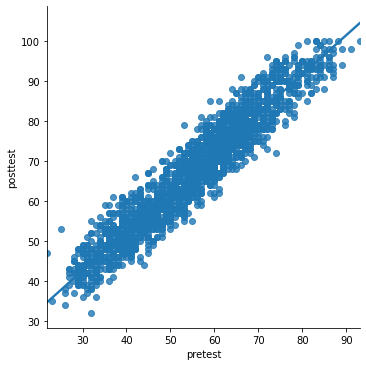

In [134]:
sns.lmplot(data=df_test, x="pretest", y="posttest")

## lunch qualification(소득 수준)에 따라 시험 결과가 다를 것이다.

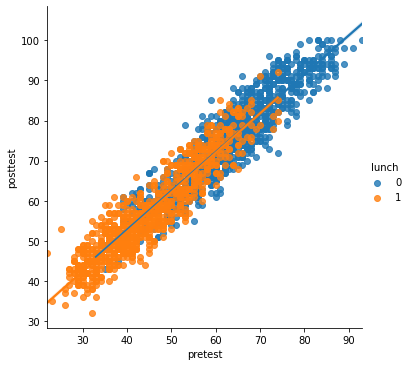

In [136]:
sns.lmplot(data=df, x="pretest", y="posttest", hue="lunch")

<AxesSubplot:xlabel='lunch', ylabel='posttest'>

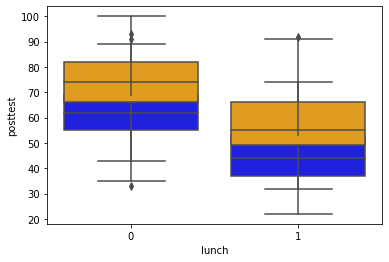

In [141]:
sns.boxplot(data=df, x="lunch", y="pretest", color="Blue")
sns.boxplot(data=df, x="lunch", y="posttest", color="Orange")

* 소득수준이 높을수록 pretest, posttest에 대한 점수가 높음

# heatmap으로 상관관계 파악